Steps:
1. Read in the data and quick EDA
2. Undersampling, write to small corpus
3. Random sampling, write to big corpus.

### Read in the data and quick EDA

In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading reviews from json file
with open('data/Video_Games_5.json','r') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df.shape

(497577, 12)

In [5]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [17]:
reviews_df['overall'].value_counts(dropna=False)

overall
5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: count, dtype: int64

Show distribution with plots

<Axes: xlabel='overall', ylabel='count'>

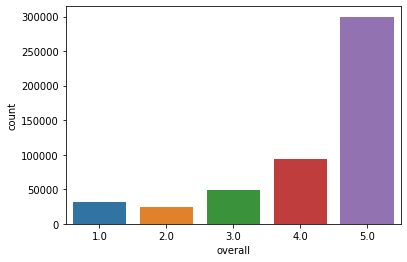

In [6]:
sns.countplot(data = reviews_df, x='overall')

### Undersampling

In [18]:
one = reviews_df[reviews_df['overall']==1.0].sample(n=1200)
two = reviews_df[reviews_df['overall']==2.0].sample(n=400)
three = reviews_df[reviews_df['overall']==3.0].sample(n=400)
four = reviews_df[reviews_df['overall']==4.0].sample(n=400)
five = reviews_df[reviews_df['overall']==5.0].sample(n=1200)

In [19]:
undersampled_reviews = pd.concat([one, two, three, four, five], axis=0)

In [20]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    1200
5.0    1200
2.0     400
3.0     400
4.0     400
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

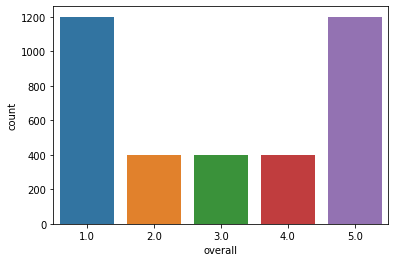

In [21]:
sns.countplot(data=undersampled_reviews, x='overall')

In [22]:
undersampled_reviews.to_csv("data/small_corpus.csv", index=False)

### Random sampling of 100k reviews

In [12]:
sample_100K = reviews_df.sample(n=100000, random_state=42)

In [13]:
sample_100K.shape

(100000, 12)

<Axes: xlabel='overall', ylabel='count'>

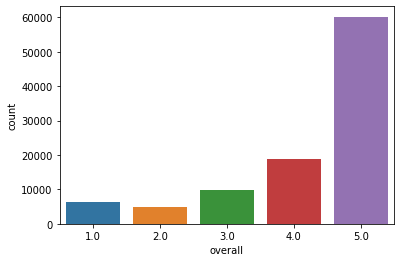

In [14]:
sns.countplot(data=sample_100K, x='overall')

In [15]:
sample_100K.to_csv("data/big_corpus.csv", index=False)